# Machine Learning and Data Analysis
----------------------------------------------
### *Session 1*


```
28th September, 2023
Anna Pallarès López
Computer Engineering Master's

```



### 1. Basic commands

In [ ]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
# random generator (used to obtain the same random value)

np.random.seed(13)

In [ ]:
# define a funtion

def oracle(x):
  return x**2

In [ ]:
# define the boundaries of the funcion

n = 4 # number of points - choice
sigma = .5 # noise - choice

x = np.random.rand(n)
y = oracle(x) + sigma*np.random.rand(n)

x = np.asmatrix(x).transpose() # it becomes a matrix
y = np.asmatrix(y).transpose() # it becomes a matrix


nt = 1000 # number of samples

xt = np.linspace(0,1,nt)
yt = oracle(xt)
xt = np.asmatrix(xt).transpose() # it becomes a matrix
yt = np.asmatrix(yt).transpose() # it becomes a matrix

In [ ]:
type(x) # function that evaluates that x is
x.shape # 8 samples, 1 features
y.shape

(4, 1)

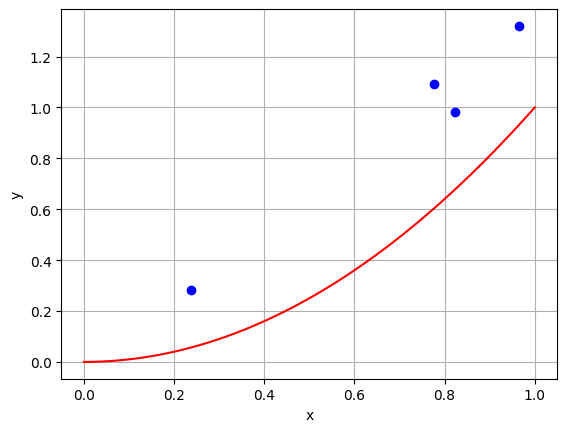

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.set(xlabel='x', ylabel='y')
ax.grid()

### Learn from data

In [ ]:
# Empirical Risk Minimisation, ERM

p = 2 # degree of the polynom, always p > 0

X = nml.ones((n,1)) # n \times (p+1), matrix of size nuber of sambles x number of features
XT = nml.ones((nt,1)) # nt \times (p+1)

for i in range(1, p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  XT = np.concatenate((XT, np.power(xt,i)), axis=1)

a = np.linalg.solve(np.matmul(np.transpose(X),X),np.matmul(np.transpose(X),y)) # solving
yp = np.matmul(XT,a) # to get the estimation od the funcion
err = np.mean(np.abs(yp-yt))
err # adding information about the oracle, is not always something that can yeld to better the results!!!

# the noise is parametrized by two parameters: the number of data (as more, the lower noise), or increase the sensibility.
# what we only can do is to improve our model, which only costs computational time


0.3072057293499123

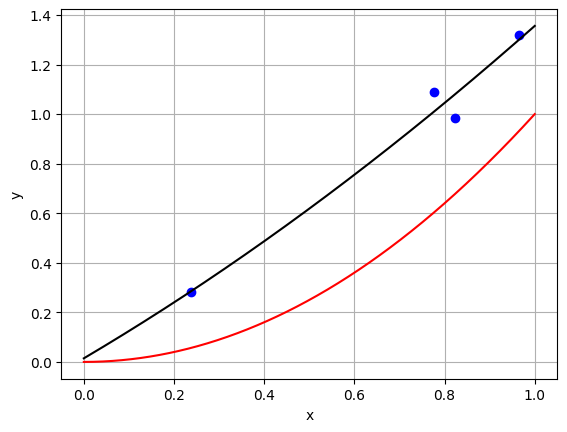

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.plot(xt,yp,'k')
ax.set(xlabel='x', ylabel='y')
ax.grid()

In [ ]:
# Structural Risk Minimisation, SRM
p = 9 # degree of the polynom, always p > 0
lam = .01 # lambda, 0 < lam <innf

X = nml.ones((n,1)) # n \times (p+1), matrix of size nuber of sambles x number of features
XT = nml.ones((nt,1)) # nt \times (p+1)

for i in range(1,p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  XT = np.concatenate((XT, np.power(xt,i)), axis=1)

M = nml.zeros((p+1,p+1))
for i in range(2, p+1):
  for j in range(2, p+1):
    M[i,j] = (i*j*(i-1)*(j-1))/(i+j-3)

a = np.linalg.solve(np.matmul(np.transpose(X),X)+lam*M,np.matmul(np.transpose(X),y)) # solving
yp = np.matmul(XT,a) # to get the estimation od the funcion
err = np.mean(np.abs(yp-yt))
err

0.3094455627118442

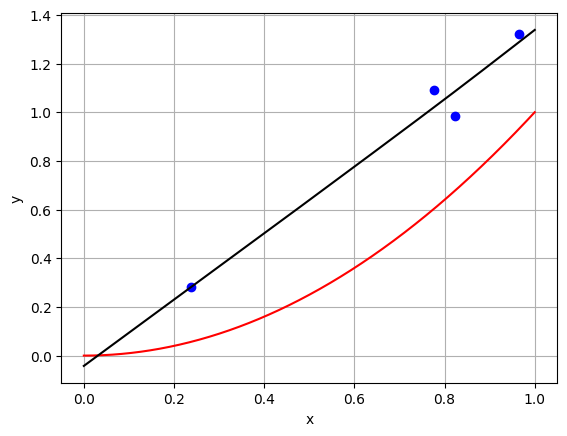

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.plot(xt,yp,'k')
ax.set(xlabel='x', ylabel='y')
ax.grid()